# Environmental Impact of Food: Carbon Footprint


## Introduction 

As the world's population expanded, the demand for food, energy and water it is increased drastically over the years, this led to rapid increase of pollution and consume of natural resources to the point that growth will soon no longer be sustainable.It has been estimated that food accounts for over a quarter (26%) of global greenhouse gas emissions, understanding the process of food production and its consequences on environment it is crucial in order to find solutions for environmental impact and to make growing of society sustainable. 


## Data exploration

In this section I import the libraries and upload the datasets needed for the analysis. The first step in data analysis must be data exploration, which is foundamental to understand the datasets that I have imported and what they contain,  the information on the type of values that are available and possible missing data.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from scipy import stats
import geopandas
import matplotlib as mpl
import missingno as msno
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.colors

pd.set_option("display.max_columns",100)

In [3]:
FAO = pd.read_csv("FAO.csv",encoding = "ISO-8859-1")
emissions = pd.read_csv("emissions-from-food (1).csv") #https://ourworldindata.org/grapher/emissions-from-food
food_row = pd.read_csv("Food_Production.csv")

In [4]:
FAO.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,1928.0,1904.0,1666.0,1950.0,2001.0,1808.0,2053.0,2045.0,2154.0,1819.0,1963.0,2215.0,2310.0,2335.0,2434.0,2512.0,2282.0,2454.0,2443.0,2129.0,2133.0,2068.0,1994.0,1851.0,1791.0,1683.0,2194.0,1801.0,1754.0,1640.0,1539.0,1582.0,1840.0,1855.0,1853.0,2177.0,2343.0,2407.0,2463.0,2600.0,2668.0,2776.0,3095.0,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,183.0,183.0,182.0,220.0,220.0,195.0,231.0,235.0,238.0,213.0,205.0,233.0,246.0,246.0,255.0,263.0,235.0,254.0,270.0,259.0,248.0,217.0,217.0,197.0,186.0,200.0,193.0,202.0,191.0,199.0,197.0,249.0,218.0,260.0,319.0,254.0,326.0,347.0,270.0,372.0,411.0,448.0,460.0,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,76.0,76.0,76.0,76.0,76.0,75.0,71.0,72.0,73.0,74.0,71.0,70.0,72.0,76.0,77.0,80.0,60.0,65.0,64.0,64.0,60.0,55.0,53.0,51.0,48.0,46.0,46.0,47.0,46.0,43.0,43.0,40.0,50.0,46.0,41.0,44.0,50.0,48.0,43.0,26.0,29.0,70.0,48.0,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,237.0,237.0,237.0,238.0,238.0,237.0,225.0,227.0,230.0,234.0,223.0,219.0,225.0,240.0,244.0,255.0,185.0,203.0,198.0,202.0,189.0,174.0,167.0,160.0,151.0,145.0,145.0,148.0,145.0,135.0,132.0,120.0,155.0,143.0,125.0,138.0,159.0,154.0,141.0,84.0,83.0,122.0,144.0,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,210.0,210.0,214.0,216.0,216.0,216.0,235.0,232.0,236.0,200.0,201.0,216.0,228.0,231.0,234.0,240.0,228.0,234.0,228.0,226.0,210.0,199.0,192.0,182.0,173.0,170.0,154.0,148.0,137.0,144.0,126.0,90.0,141.0,150.0,159.0,108.0,90.0,99.0,72.0,35.0,48.0,89.0,63.0,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [5]:
FAO.shape

(21477, 63)

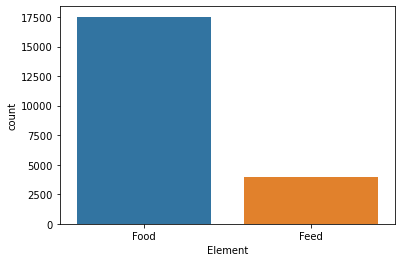

In [6]:
sns.countplot(x="Element",data=FAO);

The main dataset "FAO" contains data collected from **FAO (Food and Agricoltural organization of United Nations)** on worldwide food production distuinguishing **food** for humans and **feed** for animals. 
We can see that cotains 21477 rows and 63 columns, including name of countries, geographical data, food type and tonnes of specific food type from 1961 to 2013. The vast majority of data is represented by food type elements compared to feed elements, unit of measure is of 1000 tonnes per unit.

In [7]:
emissions.head() 

,Entity,Code,Year,Food emissions by country
0,Afghanistan,AFG,1990,10442724.8
1,Afghanistan,AFG,1991,10665824.8
2,Afghanistan,AFG,1992,10805724.8
3,Afghanistan,AFG,1993,11003824.8
4,Afghanistan,AFG,1994,11286224.8


In [8]:
emissions.shape

(5824, 4)

Emissions dataset it includes 5824 rows and 4 columns, indicating name of countries, year of reference, Co2 equivalent emissions in absolute terms by food production for each country from 1990 to 2015

In [9]:
food_row.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,11.23,8.638462,183.911552,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,35.07,49.394366,609.983722,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [10]:
food_row.shape

(43, 23)

Finally the third and last dataset is about the environmental impact of the most common food type, it includes the entire food production life cycle, cotains 43 rows and 23 columns that describe food products and relative environmental impact. Columns includes emissions related to production cycle, total of emissions and more details about the impact of food production on environment.

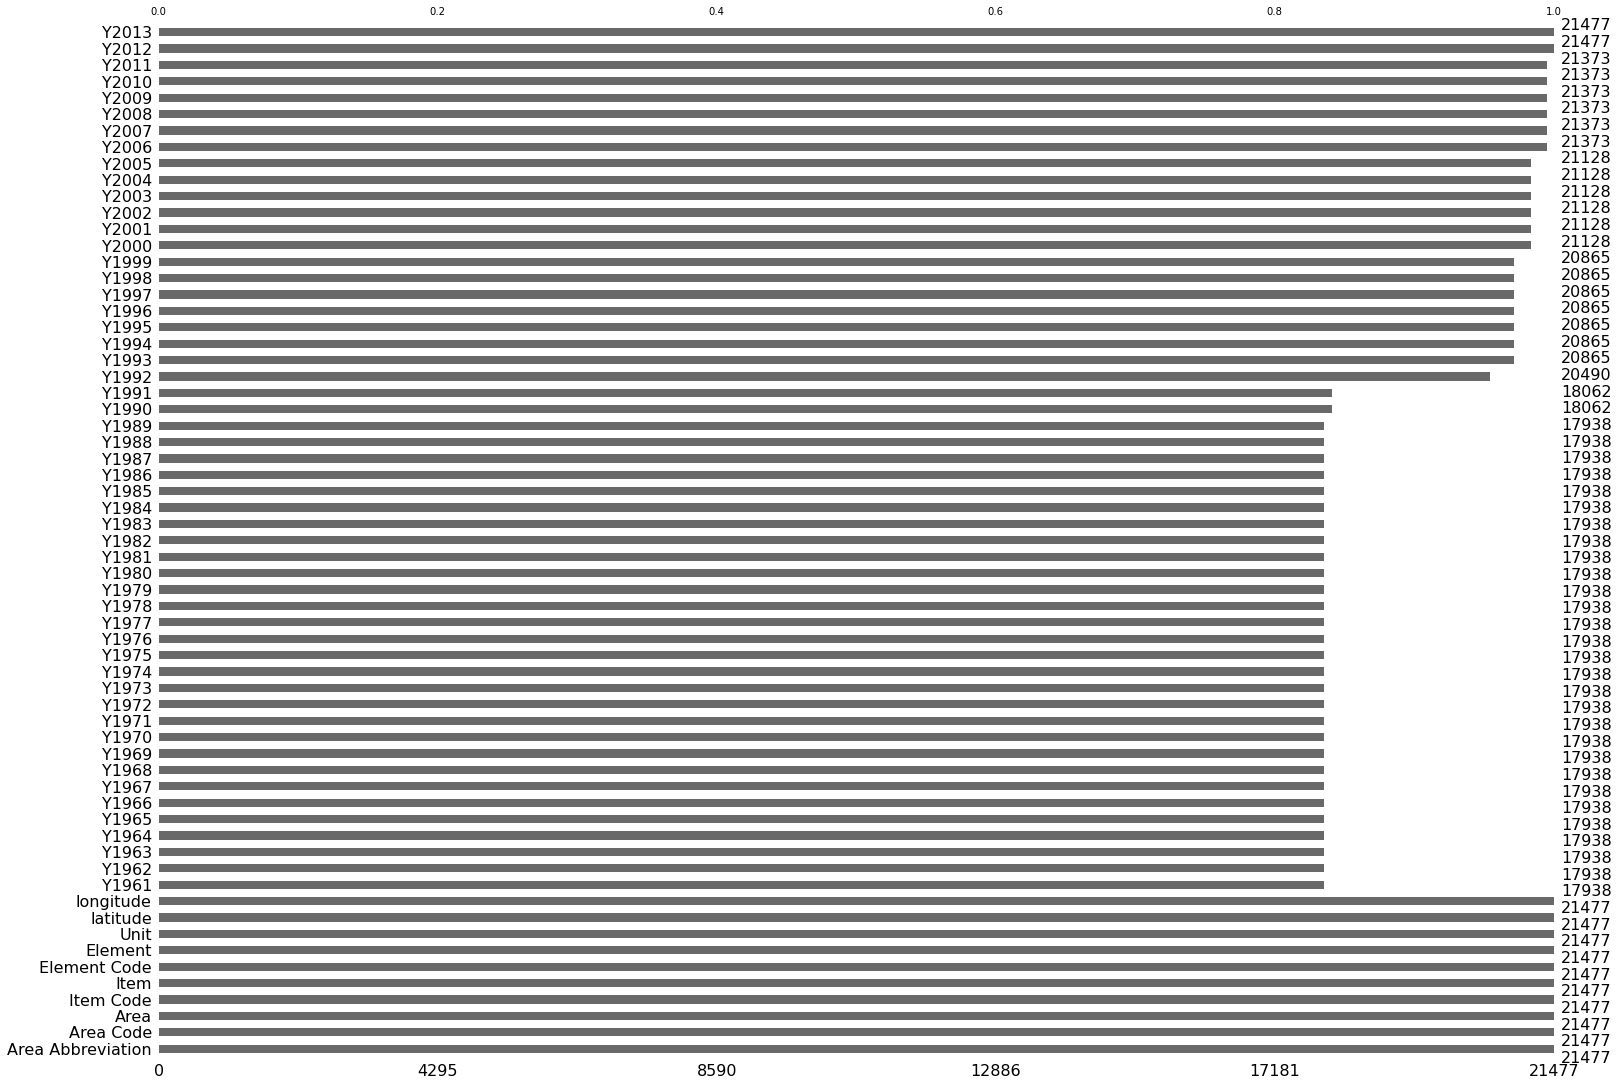

In [11]:
plt.figure(figsize=(15,10))
msno.bar(FAO)
plt.show()

In [12]:
FAO["Area"][FAO.isnull().any(axis=1)].value_counts()

Kazakhstan                                   141
Lithuania                                    140
Russian Federation                           137
Belgium                                      136
Latvia                                       136
Estonia                                      135
Ukraine                                      134
Georgia                                      133
Armenia                                      133
Slovenia                                     132
Belarus                                      131
Republic of Moldova                          130
Slovakia                                     130
The former Yugoslav Republic of Macedonia    130
Czechia                                      129
Croatia                                      129
Serbia                                       127
Luxembourg                                   127
Oman                                         124
Azerbaijan                                   124
Kyrgyzstan          

Exploring data I found that FAO dataset has many missing values which are distributed between years 1961 and 2011 columns, however most of the missing values are located between **1961 and 1993**. Countries related data on each Year column it is fully present or entirely missing, suggesting that the reason of missing values could be related to the complete absence of data of related countries during corresponding years, especially before than 90s. 

In [13]:
emissions.isnull().sum()

Entity                         0
Code                         156
Year                           0
Food emissions by country      0
dtype: int64

Missing data from global Co2 equivalent emissions by food production it refers to "Code" column which is the abbreviation of the related country name

In [14]:
food_row.isnull().sum()

Food product                                                                0
Land use change                                                             0
Animal Feed                                                                 0
Farm                                                                        0
Processing                                                                  0
Transport                                                                   0
Packging                                                                    0
Retail                                                                      0
Total_emissions                                                             0
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   10
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                    5
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      16
Freshwater withdrawals per 1000kcal (liters per 1000kcal)       

Food production life cycle dataset contains columns for Co2 equivalent emissions with no missing data, other columns present many missing values which pushed me to ignore corresponding columns.


# Data cleaning

In this section I'm going to clean data reducing dratically the amount of missing values.  

In [15]:
index = FAO.columns[42:]
index

Index(['Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000',
       'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008',
       'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013'],
      dtype='object')


In order to make reasonable analysis I decided to cut the FAO dataset to work on food production between year 1993 to 2013.

In [16]:
FAO_main = FAO.loc[:,["Area Abbreviation", "Area Code", "Area","Item Code","Item","Element Code","Element",
                           "Unit", "latitude","longitude",'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000',
       'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008',
       'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013']]

FAO_main.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,1840.0,1855.0,1853.0,2177.0,2343.0,2407.0,2463.0,2600.0,2668.0,2776.0,3095.0,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,218.0,260.0,319.0,254.0,326.0,347.0,270.0,372.0,411.0,448.0,460.0,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,50.0,46.0,41.0,44.0,50.0,48.0,43.0,26.0,29.0,70.0,48.0,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,155.0,143.0,125.0,138.0,159.0,154.0,141.0,84.0,83.0,122.0,144.0,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,141.0,150.0,159.0,108.0,90.0,99.0,72.0,35.0,48.0,89.0,63.0,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


Considering the idea of a comparison between two datasets (FAO and food emissions) I decided to create a new dataset using FAO data corresponding to year **2013** in order to avoid completely missing values

In [17]:
FAO_2013 = pd.DataFrame(FAO[['Area Abbreviation', 'Area Code', 'Area', 'Item Code', 'Item',
       'Element Code', 'Element', 'Unit', 'latitude', 'longitude', 'Y2013']])

In [18]:
FAO_2013.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,200


In [19]:
FAO_2013.isnull().sum()

Area Abbreviation    0
Area Code            0
Area                 0
Item Code            0
Item                 0
Element Code         0
Element              0
Unit                 0
latitude             0
longitude            0
Y2013                0
dtype: int64

As mentioned above, I decided to focus on Co2 equivalent emissions by food production and therefore I am going to cut the columns related to other environmental impact, this allows me to avoid missing values

In [20]:
food_production = food_row[['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions']]

In [21]:
food_production.head() 

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0


In [22]:
food_production.isnull().sum()

Food product       0
Land use change    0
Animal Feed        0
Farm               0
Processing         0
Transport          0
Packging           0
Retail             0
Total_emissions    0
dtype: int64

# Data transformation

Once I understood and cleaned the data, next step is about creating new datasets and transform some data in order to make statistical analysis easier.

In [23]:
FAO_sum = pd.DataFrame(FAO_2013.groupby(["Area","Area Abbreviation","Area Code","latitude"
                                         ,"longitude"])["Y2013"].sum()).reset_index()

In [24]:
FAO_sum.head()

,Area,Area Abbreviation,Area Code,latitude,longitude,Y2013
0,Afghanistan,AFG,2,33.94,67.71,23007
1,Albania,ALB,3,41.15,20.17,8271
2,Algeria,DZA,4,28.03,1.66,72161
3,Angola,AGO,7,-11.20,17.87,48639
4,Antigua and Barbuda,ATG,8,17.06,-61.80,119


A groupby function allows me to make a new dataset from FAO data that represents the total amount of food production by year 2013 

In [25]:
for n in FAO_2013["Area"].value_counts().index: 
    if not n in list(emissions["Entity"]): 
        print(n)

China, mainland
United States of America
China, Taiwan Province of
Russian Federation
Republic of Korea
China, Hong Kong SAR
Venezuela (Bolivarian Republic of)
Republic of Moldova
The former Yugoslav Republic of Macedonia
United Republic of Tanzania
Serbia
Bolivia (Plurinational State of)
China, Macao SAR
Brunei Darussalam
Iran (Islamic Republic of)
Côte d'Ivoire
Montenegro
Viet Nam
Cabo Verde
Lao People's Democratic Republic
Democratic People's Republic of Korea


In [26]:
emissions_new = emissions.copy()

emissions_new["Entity"].replace({"China":"China, mainland","United States":"United States of America","Taiwan":"China, Taiwan Province of",
                     "Russia":"Russian Federation","Hong Kong":"China, Hong Kong SAR","South Korea":"Republic of Korea",
                     "Venezuela" :"Venezuela (Bolivarian Republic of)","Moldova": "Republic of Moldova", 
                      "North Macedonia":"The former Yugoslav Republic of Macedonia","Tanzania":"United Republic of Tanzania",
                      "Serbia and Montenegro":"Serbia", "Bolivia":"Bolivia (Plurinational State of)","Macao":"China, Macao SAR",
                      "Brunei":"Brunei Darussalam","Iran":"Iran (Islamic Republic of)","Cote d'Ivoire" : "Côte d'Ivoire", 
                      "Vietnam":"Viet Nam","Cape Verde":"Cabo Verde","Laos" : "Lao People's Democratic Republic",
                      "Democratic People's Republic of Korea":"North Korea"}, inplace=True)               

To make a comparison between food production and green house gas emissions I need to merge the two datasets. In order to do that I need key data (country names) as corresponding between the two, I used a simple for loop to get countries which related name differ, then I modified the names in order to make them equal.

In [27]:
df = emissions_new[emissions_new["Year"]==2013]                                                          

I created a new dataset that contains data from worldwide GHG emissions related only to year 2013.

In [28]:
FAO_emissions = FAO_sum.merge(df, left_on='Area', right_on='Entity')
FAO_emissions = FAO_emissions.drop(["Entity","Code","Year"],axis=1)
FAO_emissions["Food emissions by country"] = FAO_emissions["Food emissions by country"]/1000
FAO_emissions.rename(columns={"Y2013":"Food production"},inplace=True)
FAO_emissions.head()

,Area,Area Abbreviation,Area Code,latitude,longitude,Food production,Food emissions by country
0,Afghanistan,AFG,2,33.94,67.71,23007,20948.5000
1,Albania,ALB,3,41.15,20.17,8271,4380.1111
2,Algeria,DZA,4,28.03,1.66,72161,48164.2374
3,Angola,AGO,7,-11.20,17.87,48639,129858.2048
4,Antigua and Barbuda,ATG,8,17.06,-61.80,119,139.3850


Finally I made the merge between FAO data and food emissions in 2013, considering that FAO data ("Food procuction") referres to units of tonnes as 1000 tonnes per unit, I divided "Food emissions by country" by 1000 to make the two comparable.

# Data Analysis and visualization

Datasets are cleaned and ready to be analyzed, here in this section i procedeed with analysis of the greenhouse gas emissions during  food production of the most common food types, then I analyzed the worldwide food related emissions focusing on countries with largest food production quantities. Finally I analyzed yearly growth on food production of largest producers.

Note that greenhouse gas emissions (GHG) are measured in kilograms of carbon dioxide equivalents (kgCO₂eq) per kilogram of food product. This means non-CO₂ greenhouse gases are included and weighted by their relative warming impact.

### Which food types are more responsible for GHG emissions?

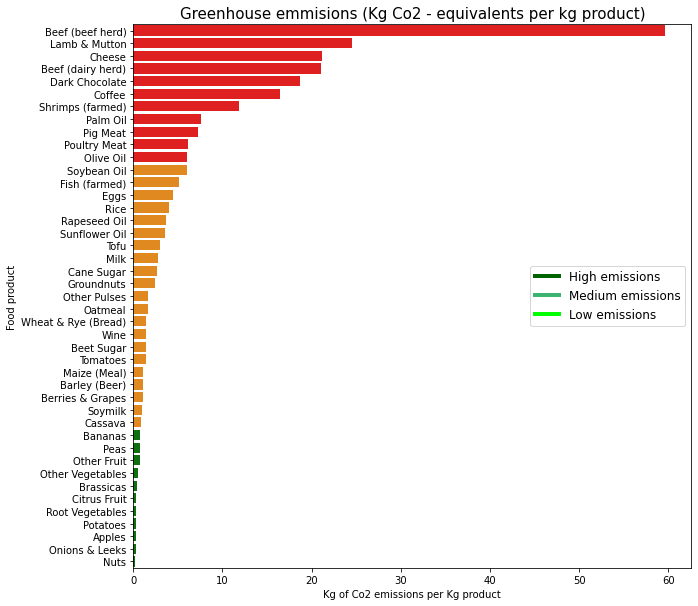

In [29]:
tot_emission = food_production.sort_values("Total_emissions", ascending= False)

quantile_25 = tot_emission["Total_emissions"].quantile(q=0.25)
quantile_75 = tot_emission["Total_emissions"].quantile(q=0.75)

colors = sns.color_palette('rocket', 2)
levels = [quantile_25, quantile_75]
cmap, norm = matplotlib.colors.from_levels_and_colors(levels, colors, extend="max")
col = np.where(tot_emission["Total_emissions"]>=quantile_75,'red',np.where(tot_emission["Total_emissions"]>=quantile_25,'darkorange','green'))


plt.figure(figsize=(10,10))
plt.title("Greenhouse emmisions (Kg Co2 - equivalents per kg product)", fontsize=15)
sns.barplot(x ="Total_emissions", y= "Food product", data = tot_emission,palette=col)


legend_elements = [Line2D([0], [0], color='darkgreen', lw=4, label='High emissions'),
                   Line2D([0], [0], color='mediumseagreen', lw=4, label='Medium emissions'),
                   Line2D([0], [0], color='lime', lw=4, label='Low emissions')]

plt.xlabel("Kg of Co2 emissions per Kg product")
plt.legend(handles=legend_elements,loc="center right",prop={'size': 12})
plt.show()

The above barchart represent the total emissions of Co2 equivalent per kg product during the entire production cycle. On first sight it is possible to observe the large difference in terms of emissions between different products. **The most impactfull food type is by far Beef(beef herd)** while the lowest amount of emissions is given by production of nuts. 

I divided data in quartiles to have a clear understanding of the patterns that i found relevant : **Low, medium and high emissions represent respectively the 25th, 50th and 75th percentile.**

An initial analysis higlights that "high emissions" is mostly, but not entirely, represented by animal-based food,**"low emissions" instead includes exclusively plant-based food type.**

Now that we know which food type is more responsible for greenhouse gas emissions, it would be interesting to check the amount of emissions for each production cycle stage.

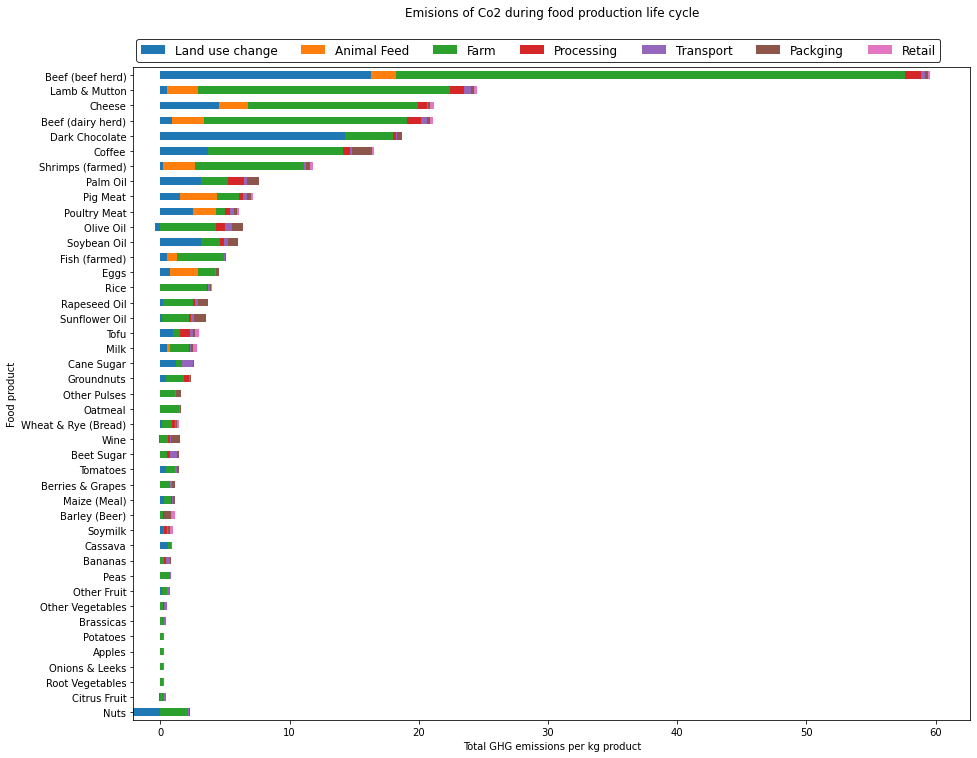

In [30]:
fig, ax = plt.subplots(1, 1,figsize=(15,12))
tot = pd.DataFrame(tot_emission.sort_values("Total_emissions").iloc[:,:-1]).set_index('Food product')
tot.plot(kind='barh',ax=ax, stacked=True, legend=False)

fig.legend( ncol=7,fontsize=12, loc='upper center', bbox_to_anchor=(0.5, 0.92),edgecolor="black")
ax.set_title("Emisions of Co2 during food production life cycle", y=1.1, pad=-14,)
plt.xlabel("Total GHG emissions per kg product")
plt.show()

For each product you can see from which stage in the supply chain its emissions originate. This extends from land use changes on the left, through to transport and packaging on the right. In this comparison we look at the total GHG emissions per kilogram of food product. 

For most foods and **particularly the largest emitters** most GHG emissions result from land use change (shown in blue), and from processes at the farm stage (green). 

Not that nuts have negative amount of  land use change emissions, this is because nut trees are currently replacing croplands and is well known that carbon is stored in the trees (*Poore, J., & Nemecek, T. (2018). Reducing food’s environmental impacts through producers and consumers. Science, 360(6392), 987-992*).

In [31]:
percentage = pd.DataFrame(tot_emission.iloc[:,1:-1].sum())
percentage = percentage.apply(lambda x:x/x.sum()*100).round(2)
#plt.figure(figsize=(6,6))
#plt.pie(percentage[0],labels=percentage.index,autopct = '%1.1f%%',wedgeprops=dict(width=0.5))

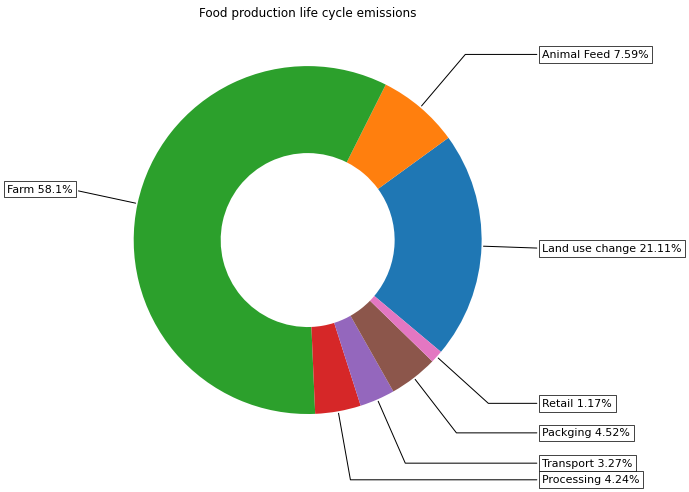

In [32]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(aspect="equal"))

labels = percentage[0].index
pie_pct = percentage[0]

pie_data = percentage[0]

wedges, texts = ax.pie(pie_data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate((labels[i] + " " + str(round(pie_pct[i],2)) + "%"), xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw,fontsize=11)

ax.set_title("Food production life cycle emissions")

plt.show()

Farm stage processes and land use change combined represent almost 80% of all GHG emissions. Transport is a small contributor to emissions, it accounts for 3.3%, meaning that eating local beef or lamb, whether they are grown locally or shipped from the other side of the world, matters very little for total emissions.

## Where do the emissions come from? 

In this chapter I want to make a comparison between Co2 equivalent emissions and food production using worldwide data collected from Crippa et al. (2021) for emissions (1990-2105),  from FAO (1961-2013) for food production. As discussed above, to make a direct comparison I used only data from year 2013 from both datasets.

In [33]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[world["name"]!="Antarctica"]
world["iso_a3"][world["name"]=="France"]= "FRA"

In [34]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


I merge emissions data to geopandas dataset that allows me to plot a world map

In [35]:
world_data = pd.merge(world,df[["Code","Food emissions by country"]],
                      left_on="iso_a3",right_on="Code", how='left')

world_data["log_emissions"] = np.log(world_data["Food emissions by country"])

I create a new columns with emissions data in logaritmic function, doing so makes the plot more readable.

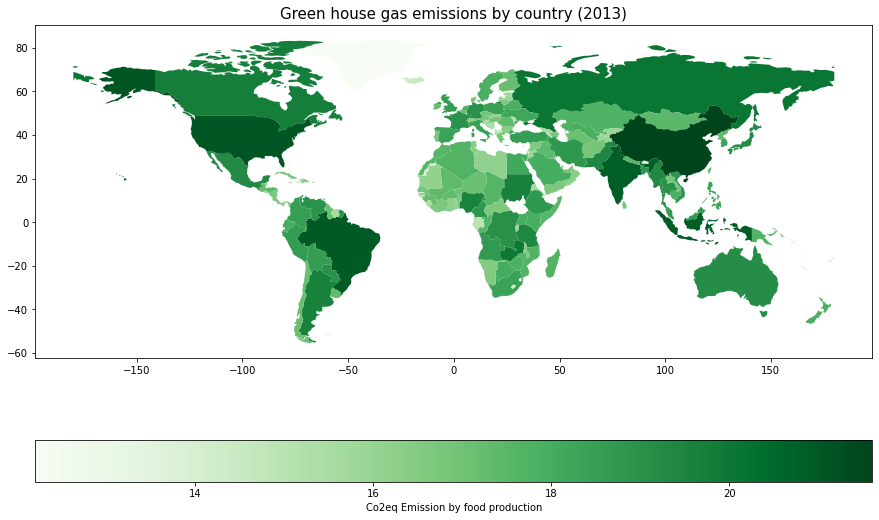

In [36]:
fig, ax = plt.subplots(1, 1,figsize=(15,10))
world_data.plot(column="log_emissions",ax=ax, legend=True,legend_kwds={'label': "Co2eq Emission by food production",
                        'orientation': "horizontal"}, cmap="Greens");
plt.title("Green house gas emissions by country (2013)",fontsize=15)
plt.show()

In the map we see the total of global food emissions that are produced in each country. The more is the amount of GHG emissions, the darker is the colour of the country.The largest emitters are countries that we might expect, either because they have a large population size or are large agricultural producers. 

Next I am going to make a direct comparison between emissions and production. 

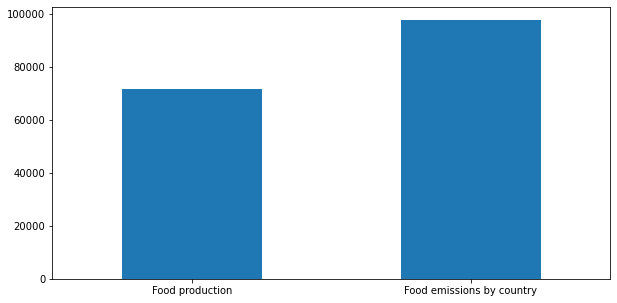

In [37]:
food_co2 = FAO_emissions[["Food production","Food emissions by country"]].mean().plot(kind="bar",figsize=(10,5),rot=0)

In absolute terms, the total registered worldwide tonnes of emissions are greater than producted food tonnes, this is not surprising as we saw that a single Kg of Beef it's responsible for almost 60 Kg of Co2 equivalent emission.

It is reasonable to assume a correlation between the two variables, therefore I am going to cut the outliers and measure the correlation.

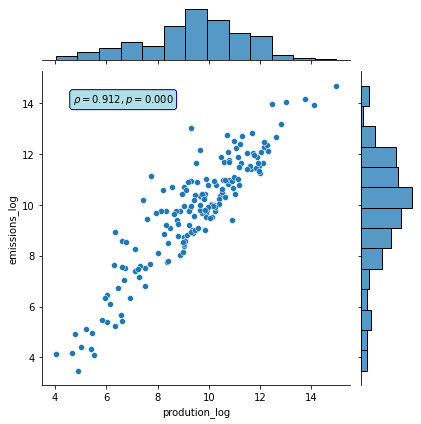

In [38]:
FAO_emissions["emissions_log"] = np.log(FAO_emissions["Food emissions by country"]) 
FAO_emissions["prodution_log"] = np.log(FAO_emissions["Food production"]) 

r, p = stats.pearsonr(FAO_emissions["prodution_log"], FAO_emissions["emissions_log"])

corr = sns.jointplot(x="prodution_log",y="emissions_log",data=FAO_emissions)
corr.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'});

Unsurprisingly there is quite strong correlation between the amount of food producted and the amoung to GHG emitted, however visualization is not so easy because of the small amount of extremely large values. 


Final analysis will include a comparison to largest food producers in the world to see how they differ between each other

In [39]:
largest_producers = FAO_emissions.sort_values("Food production",ascending=False).head(10).reset_index(drop=True)
largest_producers.head(10)

,Area,Area Abbreviation,Area Code,latitude,longitude,Food production,Food emissions by country,emissions_log,prodution_log
0,"China, mainland",CHN,41,35.86,104.20,3191155,2.409913e+06,14.695101,14.975893
1,India,IND,100,20.59,78.96,1336593,1.099330e+06,13.910212,14.105634
2,United States of America,USA,231,37.09,-95.71,938639,1.440518e+06,14.180514,13.752186
3,Brazil,BRA,21,-14.24,-51.93,439967,1.282537e+06,14.064351,12.994455
4,Russian Federation,RUS,185,61.52,105.32,370913,5.210179e+05,13.163540,12.823723
5,Nigeria,NGA,159,9.08,8.68,300923,3.126455e+05,12.652825,12.614610
6,Indonesia,IDN,101,-0.79,113.92,256888,1.163410e+06,13.966866,12.456395
7,Germany,DEU,79,51.17,10.45,218891,1.819502e+05,12.111488,12.296329
8,Mexico,MEX,138,23.63,-102.55,210121,2.345960e+05,12.365620,12.255439
9,Pakistan,PAK,165,30.38,69.35,190505,2.604026e+05,12.469984,12.157434


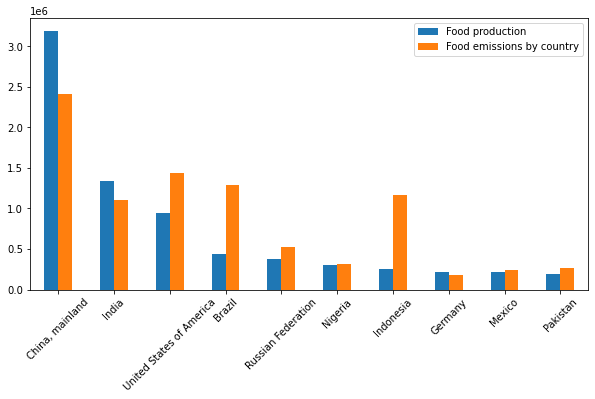

In [40]:
compare = largest_producers[["Food production","Food emissions by country"]].plot(kind="bar",figsize=(10,5))
compare.set_xticklabels(largest_producers["Area"],rotation=45)
plt.show()


The bar chart shows that China is largest food producer and also the largest emitter of GHG, however emissions appear to be lower than food production, same for India. Instead USA and Brazil have an higher total of emissions compared with production.

The reason of this difference may be the result of different aspect of food production, in fact as shown above the specific food types differ drastically in terms of related emissions. Let's have a look on the most common food producted in these areas. 

In [41]:
largest_food = FAO_2013[FAO_2013.Area.isin(largest_producers["Area"])]
largest_food= largest_food.sort_values(["Area","Y2013"],ascending=False).reset_index(drop=True)

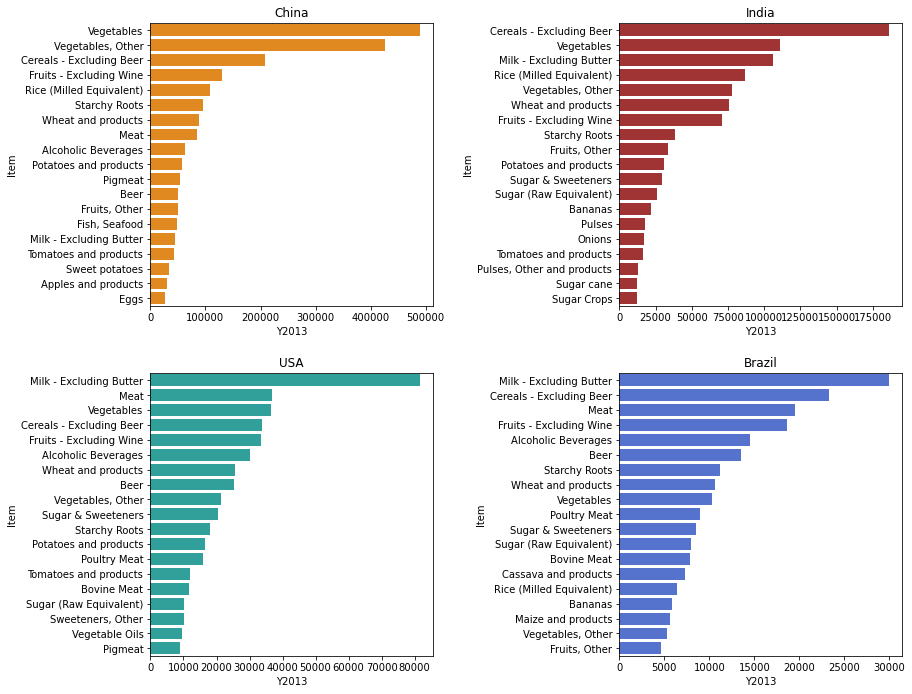

In [42]:
plt.figure(figsize=(13,10))

usa = largest_food[(largest_food.Area=="United States of America") & (largest_food.Element=="Food")].head(20)
china = largest_food[(largest_food.Area=="China, mainland") & (largest_food.Element=="Food")].head(20)
brazil = largest_food[(largest_food.Area=="Brazil") & (largest_food.Element=="Food")].head(20)
india = largest_food[(largest_food.Area=="India") & (largest_food.Element=="Food")].head(20)

plt.subplot(221)
sns.barplot(x="Y2013",y="Item",data=china,color="darkorange")
plt.title("China")

plt.subplot(222)
sns.barplot(x="Y2013",y="Item",data=india,color="firebrick")
plt.title("India")

plt.subplot(223)
sns.barplot(x="Y2013",y="Item",data=usa,color="lightseagreen",)
plt.title("USA")

plt.subplot(224)
sns.barplot(x="Y2013",y="Item",data=brazil,color="royalblue")
plt.title("Brazil")


plt.tight_layout(pad=2.0)
plt.show()

We can see from the charts that China's aswell as India's food production include plant-based food on top of the products, while USA and Brazil most produced food type are animal-based. This is important to understand the main difference in production/emissions, as we saw above animal-based food products are the most responsible for GHG emissions.

Previously data showed that beef, or bovine meat, is by far the largest responsible for emissions, it would be interesting to see which country have the larger production 

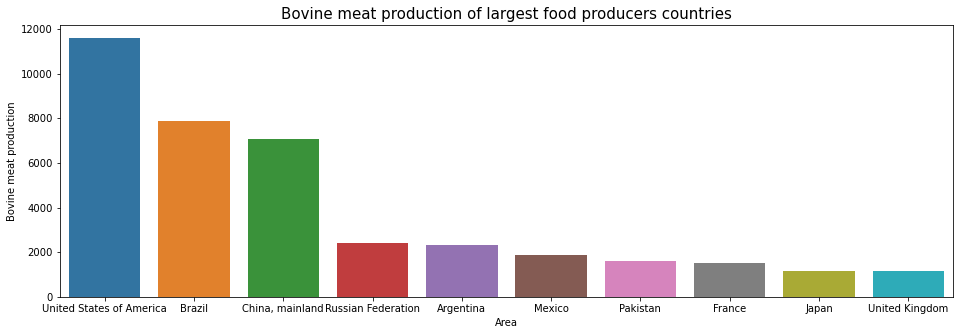

In [43]:
FAO_bovine= FAO_2013[FAO_2013["Item"]=="Bovine Meat"]
FAO_bovine = FAO_bovine.sort_values("Y2013",ascending=False)
plt.figure(figsize=(16,5))
sns.barplot(x="Area",y="Y2013",data=FAO_bovine.head(10))
plt.title("Bovine meat production of largest food producers countries",fontsize=15)
plt.ylabel("Bovine meat production")
plt.show()

USA and brazil are the top of the list, their production of bovine meat is definetly larger then other countries, although China's production isn't much lower, however we need to consider that China has by far the largest food production quantity in general.

Finally I want to analyze the overall growth in terms of food production between largest producers between year 1993 and 2013

In [44]:
largest_producer_main = FAO_main[FAO_main.Area.isin(largest_producers["Area"])].sort_values("Area").reset_index(drop=True)
growth = largest_producer_main.groupby(["Area"])[FAO_main.columns[10:]].sum().reset_index()

growth.head()

,Area,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,Brazil,269658.0,285793.0,310646.0,296138.0,304748.0,301059.0,311399.0,332274.0,322017.0,333042.0,335122.0,353635.0,357158.0,376499.0,384071.0,423546.0,410338.0,429110.0,449439.0,439247,439967
1,"China, mainland",1522331.0,1605487.0,1718202.0,1816327.0,1851318.0,1919109.0,2008790.0,2164099.0,2219943.0,2300071.0,2314540.0,2374847.0,2432309.0,2439722.0,2527905.0,2653346.0,2744815.0,2865116.0,2994756.0,3108577,3191155
2,Germany,205382.0,206518.0,207780.0,211402.0,205932.0,209584.0,206727.0,217063.0,213744.0,219432.0,209830.0,215978.0,217398.0,217313.0,215849.0,221273.0,222413.0,210659.0,214165.0,215798,218891
3,India,758811.0,780455.0,808109.0,823412.0,856044.0,907653.0,949204.0,934346.0,951943.0,932637.0,964933.0,958430.0,988532.0,1056344.0,1120149.0,1164815.0,1166783.0,1226850.0,1267739.0,1295189,1336593
4,Indonesia,147154.0,155720.0,174641.0,169422.0,166639.0,166540.0,173823.0,177495.0,181527.0,188244.0,194695.0,200569.0,203166.0,210710.0,216034.0,221464.0,231466.0,236193.0,249788.0,257587,256888


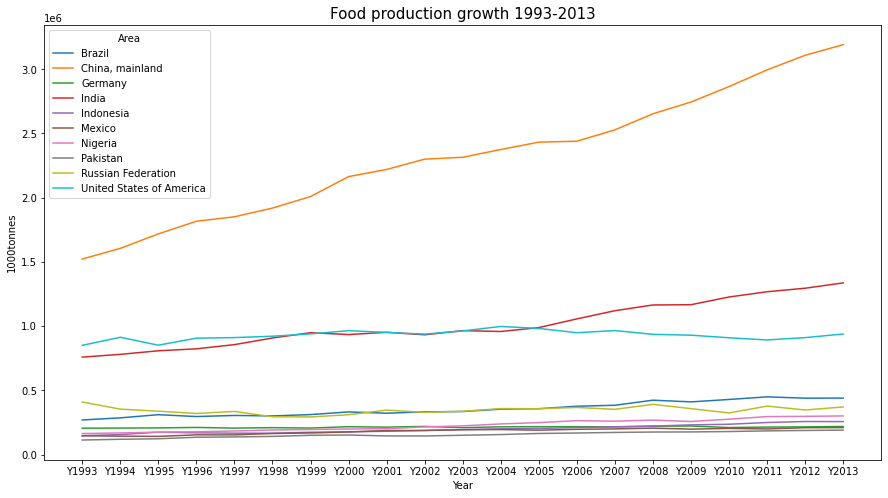

In [45]:
growth_plot= pd.melt(growth,id_vars=["Area"],value_vars=['Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013'], var_name="Year",value_name="1000tonnes")

plt.figure(figsize=(15,8))
sns.lineplot(x="Year",y="1000tonnes",hue="Area",data=growth_plot,markers=True)
plt.title("Food production growth 1993-2013",fontsize=15);

Data shows that China and India have an higher growth compared to others, USA and Brazil appear as stable, it is not surprising given that China and India were still considered as developing countries during the referreal period.

To ensure the hypothesis I am going to analyze the percentage change of total food by year.

In [46]:
pctdf= pd.DataFrame(growth[index].pct_change(axis=1))
pctdf["Area"] = growth["Area"]
da = pd.melt(pctdf,id_vars=["Area"],value_vars=['Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013'], var_name="Year",value_name="pct_change")

da.tail()

,Area,Year,pct_change
205,Mexico,Y2013,0.004182
206,Nigeria,Y2013,0.010517
207,Pakistan,Y2013,0.014204
208,Russian Federation,Y2013,0.068406
209,United States of America,Y2013,0.030863


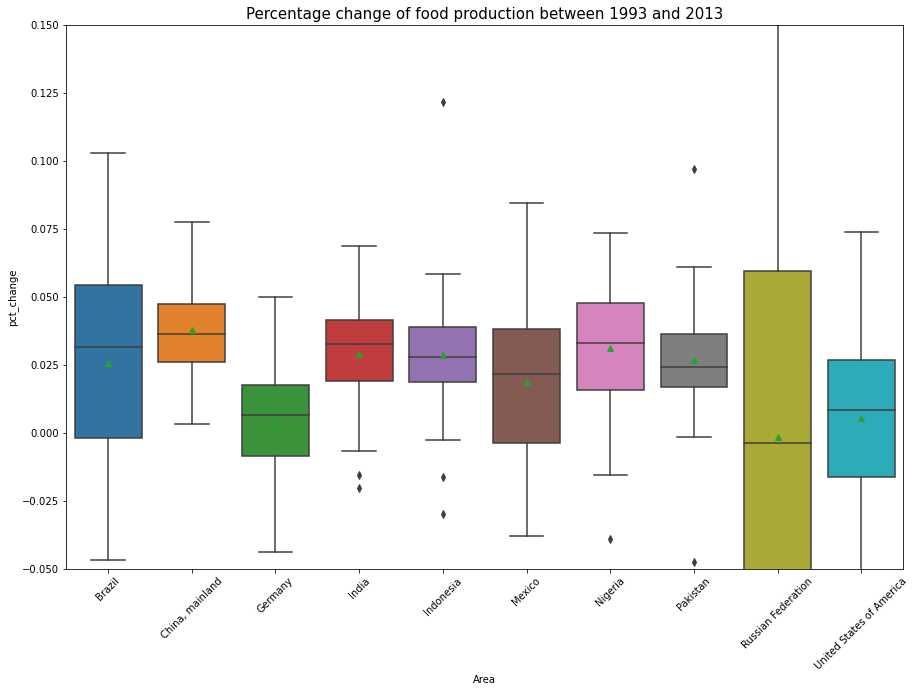

In [47]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Area",y="pct_change",data=da, showmeans=True)
plt.ylim(-0.05,0.15)
plt.xticks(rotation=45)

plt.title("Percentage change of food production between 1993 and 2013", fontsize=15)
plt.show()

China has the higher percentage change mean compared to other countries (0.037862%), lowest mean is represented by Russia which growth actually decreased by a mean of -0.00159% each year.

## Conclusion

Largest food producers in the world are also the largest emitters of greenhouse gas emissions, on top of the list there are China, Usa, Brazil and India. However comparison between food production and emissions highlighted large differences between countries. One of the reason of this difference may be related to the most common food type producted in different countries. Countries with high production of meat and, in general, animal based food types tend to have higher emission compared to their production. This is supported by the analysis of the impact of different food types which clearly shows that animal based products, especially bovines, have the higher impact in terms of Co2 equival emissions.